In [1]:
#https://robotwealth.com/demystifying-the-hurst-exponent-part-1/
#https://robotwealth.com/demystifying-the-hurst-exponent-part-2/

import pandas as pd
import statsmodels.api as sm
import numpy as np
import statsmodels.tsa.stattools as ts

In [2]:
df = pd.read_csv('datasets/data.csv')
data = df[['AALR3', 'ABCB4']]
data.columns = ['y', 'x']
x_var = sm.add_constant(data['x'])
y_var = data['y']

df = df[df.columns.difference(['Data'])]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [4]:
class Hurst():
    """
    If Hurst Exponent is under the 0.5 value of a random walk, then the series is mean reverting
    """

    def __init__(self):
        self.h_min = 0.0
        self.h_max = 0.4
        self.look_back = 126
        self.lag_max = 20#100
        self.h_value = None
    
    def apply_hurst(self, time_series):
        lags = range(2, self.lag_max)

        tau = [np.sqrt(np.std(np.subtract(time_series[lag:], time_series[:-lag]))) for lag in lags]
        poly = np.polyfit(np.log(lags), np.log(tau), 1)
        self.h_value = poly[0]*2.0 

    def use(self):
        return (self.h_value < self.h_max) and (self.h_value > self.h_min)

In [19]:
hurst = Hurst()
hurst.apply_hurst(y_var.as_matrix())
print(hurst.h_value)

0.6776821383134018


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [36]:
def hurst_ernie_chan(p):
    lags = range(2, 20)
    variancetau = []
    for lag in lags: 
        #tau.append(lag)

        # Compute the log returns on all days, then compute the variance on the difference in log returns
        # call this pp or the price difference
        pp = np.subtract(p[lag:], p[:-lag])
        variancetau.append(np.var(pp))

    # we now have a set of tau or lags and a corresponding set of variances.
    # plot the log of those variance against the log of tau and get the slope
    m = np.polyfit(np.log10(lags),np.log10(variancetau), 1)

    hurst = m[0] / 2

    return hurst

In [37]:
hurst_ernie_chan(y_var.as_matrix())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


2.7107285532536096

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


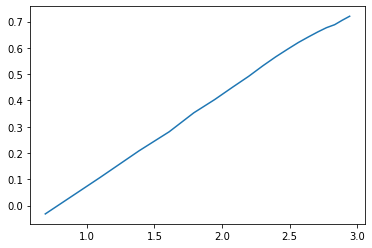

hurst =  0.6776821383134018


In [28]:
#https://robotwealth.com/demystifying-the-hurst-exponent-part-1/
from pylab import plot, show

# first, create an arbitrary time series, ts
ts = y_var.as_matrix()

# calculate standard deviation of differenced series using various lags
lags = range(2, 20)
tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]
# plot on log-log scale
plot(np.log(lags), np.log(tau)); 
show()
# calculate Hurst as slope of log-log plot
m = np.polyfit(np.log(lags), np.log(tau), 1)
hurst = m[0]*2.0
print('hurst = ',hurst)